In [1]:
import pandas as pd
import numpy as np

In [2]:
glass = pd.read_csv('glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
from sklearn.model_selection import train_test_split

X = glass.drop('Type', axis=1)
y = glass['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=33)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.9069767441860465

In [4]:
clf = RandomForestClassifier(
    min_samples_leaf=2,
    criterion='entropy',
    class_weight='balanced_subsample',
    random_state=33
)

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9302325581395349

In [5]:
y_preds = clf.predict(X_test)
y_preds

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 6, 5, 2, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 3, 2, 1, 1, 5, 1, 1, 2, 3, 2, 1, 7, 5, 3, 1, 7, 2, 7, 1],
      dtype=int64)

In [6]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

accuracy_score(y_test, y_preds)
recall_score(y_test, y_preds, average='macro')
precision_score(y_test, y_preds, average='macro')
f1_score(y_test, y_preds, average='macro')
print(f'accuracy_score: {accuracy_score(y_test, y_preds)}, recall_score: {recall_score(y_test, y_preds, average="macro")}, precision_score: {precision_score(y_test, y_preds, average="macro")}, f1_score: {f1_score(y_test, y_preds, average="macro")}')


accuracy_score: 0.9302325581395349, recall_score: 0.9642857142857143, precision_score: 0.955840455840456, f1_score: 0.9563071895424837


Text(0.5, 1.0, 'Metrics')

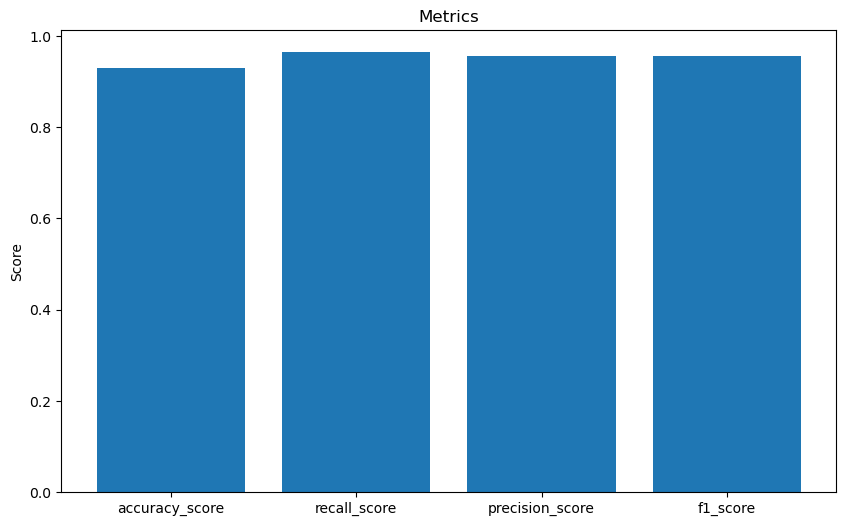

In [7]:
import matplotlib.pyplot as plt

# plot all scores

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(['accuracy_score', 'recall_score', 'precision_score', 'f1_score'],
        [accuracy_score(y_test, y_preds), recall_score(y_test, y_preds, average="macro"), precision_score(y_test, y_preds, average="macro"), f1_score(y_test, y_preds, average="macro")])

ax.set_ylabel('Score')
ax.set_title('Metrics')



In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_preds)

array([[11,  0,  0,  0,  0,  0],
       [ 2, 11,  0,  0,  0,  1],
       [ 0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  8]], dtype=int64)

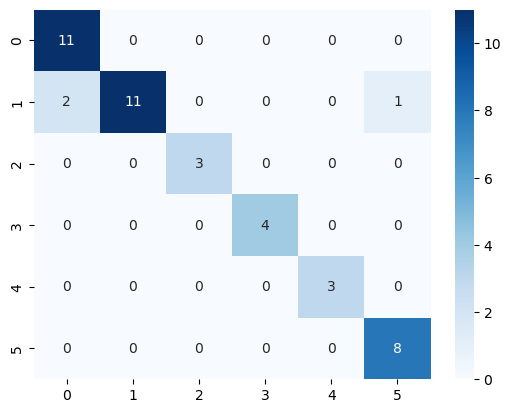

In [13]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cmap='Blues', fmt='g');



In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       0.85      1.00      0.92        11
           2       1.00      0.79      0.88        14
           3       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.93        43
   macro avg       0.96      0.96      0.96        43
weighted avg       0.94      0.93      0.93        43



In [17]:
import joblib

joblib.dump(clf, 'glass_clf.joblib')

['glass_clf.joblib']

In [18]:
import pickle

pickle.dump(clf, open('glass_clf.pickle', 'wb'))